# E x  B drift for an arbitrary electric potential

Consider a particle of charge $q$ and mass $m$ moving in a constant magnetic field, $\boldsymbol{B} = (0, 0, B_z)$ perpendicular to an electric field derived from some potential $V(x,y)$: $\boldsymbol{E} = -\nabla V$. Concretely, suppose that $V(x,y)$ is a two-dimensional Gaussian function centred on $(x_0, y_0)$ with a characeristic width $\alpha$:
$$
V(x,y) = \exp\left( -\frac{(x-x_0)^2 + (y-y_0)^2}{\alpha} \right)
$$
The motion of a particle in this electromagnetic field can be shown to consist of gyromotion around an isocontour line of the electrostatic potential. This can be demonstrated by numerical integration of the Lorentz equation of motion, as illustrated below.

In [133]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')

In [134]:
# Setup a time grid on which to carry out the integration.
dt = 0.001
N = 10000
tmax = (N-1)*dt
t = np.linspace(0, tmax, N)

In [152]:
# particle mass, charge and charge/mass ratio.
m, q = 0.01, 1
qom = q / m
# Parameters for the electrostatic potential, a 2D Gaussian
# centred at (Vx0, Vy0) with characteristic width alpha.
alpha = 10
Vx0, Vy0 = 1,1

# Initial particle position and velocity.
x0, vx0, y0, vy0 = (0, 7.6, 0, 0)

# Fixed, constant magnetic field in z-direction
Bz = 0.3
def get_Bz(x, y):
    """Return Bz at point (x, y) in space."""
    return Bz

def get_V(x, y):
    """Electrostatic potential function."""
    V = np.exp(-((x-Vx0)**2+(y-Vy0)**2)/alpha)
    return  V

def get_E(x, y):
    """Return the electric field, (Ex, Ey) = -∇V at point (x, y) in space."""
    V = get_V(x, y)    
    return 2*(x-Vx0)/alpha * V, 2*(y-Vy0)/alpha * V

In [136]:
# Draw the contours of electrostatic potential.
cN = 100
x = np.linspace(-3, 5, cN)
y = np.linspace(-3, 5 ,cN)
X, Y = np.meshgrid(x, y)

# Make sure we have a contour along the guiding centre so add the gyroradius,
# rlam, to a contour position on the particle's trajectory.
rlam = vx0 / qom / Bz
levels = get_V(np.array([5,4,3,2,1]) + rlam, np.array([0]*5))
plt.contour(X, Y, get_V(X, Y), colors='k', levels=levels)
# Draw markers representing the magnetic field coming out of the plane of the plot.
plt.scatter(X[::cN//10, ::cN//10], Y[::cN//10, ::cN//10], marker='o', edgecolors='gray', s=200, c='white')
plt.scatter(X[::cN//10, ::cN//10], Y[::cN//10, ::cN//10], marker='.', c='gray')

In [137]:
def deriv(X, t):
    """Return the derivatives x, dxdt, y, dydt to the ODE solved."""
    x, xdot, y, ydot = X
    Bz = get_Bz(x, y)
    Ex, Ey = get_E(x, y)
    xdotdot = qom * (Ex + ydot * Bz)
    ydotdot = qom * (Ey - xdot * Bz)
    return xdot, xdotdot, ydot, ydotdot 

In [138]:
# Integrate the ODE with the provided initial conditions.
X0 = (x0, vx0, y0, vy0)
P = odeint(deriv, X0, t)
x, _, y, _ = P.T

plt.plot(x,y)

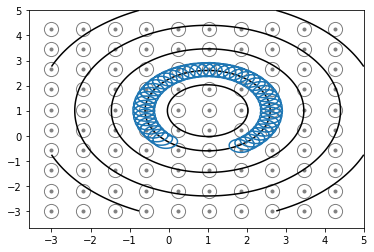

In [139]:
plt.show()

In [150]:
def init():
    """Initialize the trajectory animation."""
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    levels = get_V(np.array([5,4,3,2,1]) + rlam, np.array([0]*5))
    ax.contour(X, Y, get_V(X, Y), colors='k', levels=levels)
    # Draw markers representing the magnetic field coming out of the plane of the plot.
    ax.scatter(X[::cN//10, ::cN//10], Y[::cN//10, ::cN//10], marker='o', edgecolors='gray', s=200, c='white')
    ax.scatter(X[::cN//10, ::cN//10], Y[::cN//10, ::cN//10], marker='.', c='gray')

    ln, = ax.plot(x[0], y[0])
    
    return fig, ax, ln

def animate(i):
    """The main animation function, called for each frame."""
    
    ln.set_data(P[:i,0], P[:i,2])

fig, ax, ln = init()
anim = animation.FuncAnimation(fig, animate, frames=5000, interval=5, blit=False)

In [151]:
from IPython.display import HTML
HTML(anim.to_html5_video())